In [1]:
# delta Y_o matrix in equation 13

In [53]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import re
import regionmask
import cartopy.crs as ccrs
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script

In [2]:
# Name of input Netcdf file
case_names = ['Jan', 'Feb', 'Mar'] # name parts of 3 simulations

input_directory = '/geos/u73/msadiq/GEOS-Chem/analysis/python/data/'
input_file = 'delta_Y.nc'

output_directory = input_directory

# Name of output netCDF file
output_file = output_directory + 'tmp.nc'

In [3]:
ds_delta_y = xr.open_dataset(input_directory + input_file)
ds_delta_y

<xarray.Dataset>
Dimensions:                     (lat: 91, lon: 144)
Coordinates:
  * lat                         (lat) float64 -90.0 -88.0 -86.0 ... 88.0 90.0
  * lon                         (lon) float64 -180.0 -177.5 ... 175.0 177.5
Data variables:
    tmp                         (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag1   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag2   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag3   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag4   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag5   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag6   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag7   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag8   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag9   (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag10  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag11  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag12  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag13  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag14  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag15  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag16  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag17  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag18  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag19  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag20  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag21  (lat, lon) float32 ...
    Jan_X_SpeciesConc_CO2Tag22  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag1   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag2   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag3   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag4   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag5   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag6   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag7   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag8   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag9   (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag10  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag11  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag12  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag13  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag14  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag15  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag16  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag17  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag18  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag19  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag20  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag21  (lat, lon) float32 ...
    Feb_X_SpeciesConc_CO2Tag22  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag1   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag2   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag3   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag4   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag5   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag6   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag7   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag8   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag9   (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag10  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag11  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag12  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag13  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag14  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag15  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag16  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag17  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag18  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag19  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag20  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag21  (lat, lon) float32 ...
    Mar_X_SpeciesConc_CO2Tag22  (lat, lon) float32 ...
Attributes:
    unit:     ppbv

In [4]:
tag1 = ds_delta_y['Jan_X_SpeciesConc_CO2Tag1']
mask = regionmask.defined_regions.giorgi.mask(tag1)

In [7]:
varnames = list(ds_delta_y.data_vars.keys())  # Get a list of variable names. The expression is a bit cumbersome. Just copy and paste it for now.
#varnames[1:]

In [10]:
jan_tag1_regional = ds_delta_y['Jan_X_SpeciesConc_CO2Tag11'].groupby(mask).mean('stacked_lat_lon')
ds_regional = jan_tag1_regional.to_dataset()

/geos/u73/msadiq/libs/miniconda/base/envs/geo/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


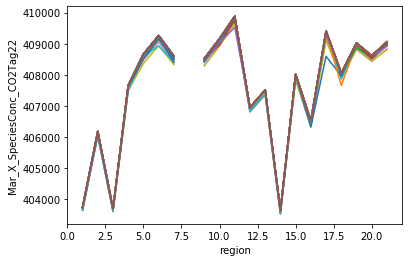

In [13]:
for ivar in varnames[1:]:
    tmp = ds_delta_y[ivar].groupby(mask).mean('stacked_lat_lon')
    ds_regional[ivar] = tmp.copy()

In [83]:
matrix = np.array(np.zeros(66*21)).reshape(66,21)
matrix.shape
#np.delete(matrix, 0, 0).shape

(66, 21)

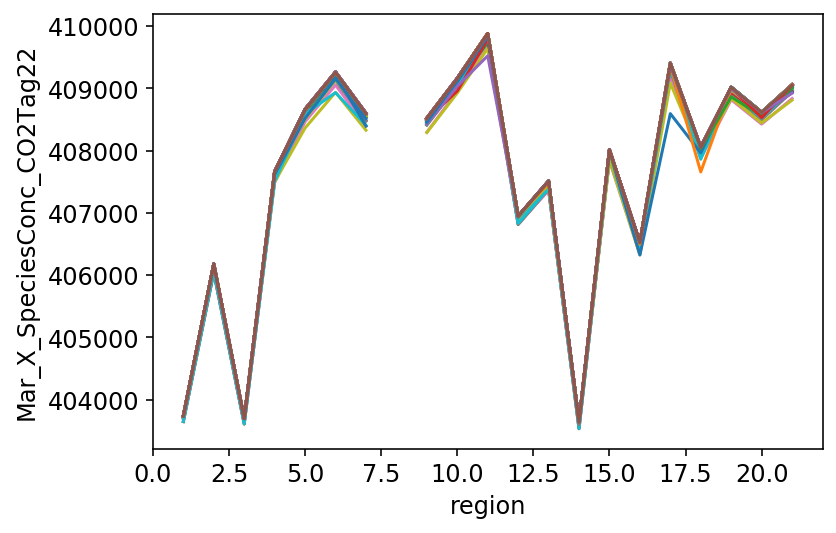

In [84]:
for n,ivar in enumerate(varnames[1:]):
    matrix[n,:] = ds_regional[ivar]
    ds_regional[ivar].plot()

In [85]:
matrix = np.delete(matrix, [21,43,65], 0)
mean = matrix.mean(axis = 0)
diff = mean - matrix
diff.shape

(63, 21)

In [86]:
names = regionmask.defined_regions.giorgi[jan_tag1_regional.region.values].names
names

['Australia',
 'Amazon Basin',
 'Southern South America',
 'Central America',
 'Western North America',
 'Central North America',
 'Eastern North America',
 'Alaska',
 'Greenland',
 'Mediterranean Basin',
 'Northern Europe',
 'Western Africa',
 'Eastern Africa',
 'Southern Africa',
 'Sahara',
 'Southeast Asia',
 'East Asia',
 'South Asia',
 'Central Asia',
 'Tibet',
 'North Asia']

<Figure size 864x864 with 0 Axes>

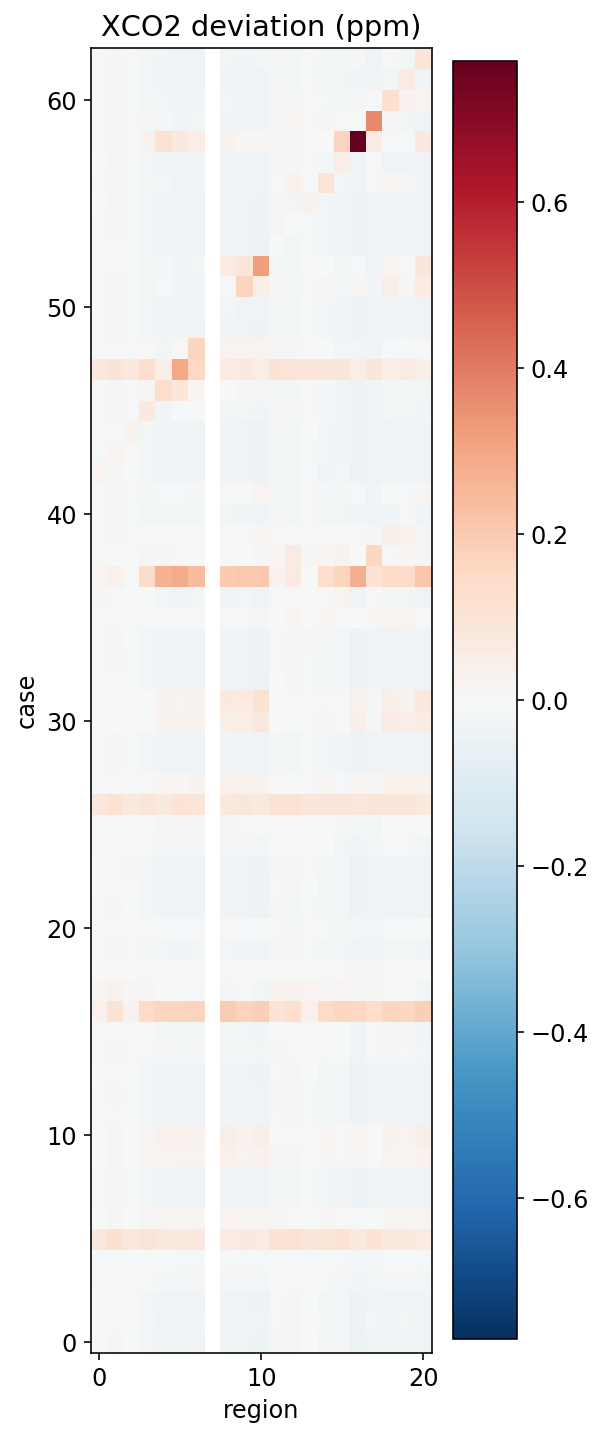

In [90]:
diff_da = xr.DataArray(diff*1e-3,
                       dims = ['case', 'region'],
                       coords = [range(63), range(len(names))])

fig = plt.figure(figsize=[12, 12])
diff_da.plot.pcolormesh(size = 12, aspect = 0.318)
plt.title('XCO2 deviation (ppm)')
plt.savefig(output_directory + 'xco2_deviation.png')